# `GOOGLE FINANCE WEBSCRAPPING.`

In [286]:
## First, I imported the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## For webscrapping
from bs4 import BeautifulSoup
import requests

# `1. WEBSCRAPPING`

In [287]:
# Check the response
if r.status_code == 200:
    # Successfully retrieved the page
    print(r)
else:
    print(f"Request failed with status code: {r.status_code}")

<Response [200]>


In [288]:
## Here, I created a list of the companies enlisted in the Google Finance platform
companies = ['TSLA:NASDAQ','FNGD:NYSEARCA','NVDA:NASDAQ','RIVN:NASDAQ', 'U:NYSE','PLUG:NASDAQ','FUTU:NASDAQ','AAPL:NASDAQ','PYPL:NASDAQ','GRAB:NASDAQ','CCL:NYSE','SQ:NYSE','JD:NASDAQ','FRO:NYSE','AAL:NASDAQ','GOLD:NYSE','BABA:NYSE', 'BEKE:NYSE','AMD:NASDAQ','NOK:NYSE' ,'PDD:NASDAQ', 'F:NYSE', 'AMZN:NASDAQ','UPST:NASDAQ','EQNR:NYSE']

In [289]:
def company_scrapper(company):

    ## Defining my user-agent for identifying the webscrapping tool that is making requests to a website
    header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36"}
    ## Getting the url
    url= f"https://www.google.com/finance/quote/{company}"
    ## Instantianting a get request
    r=requests.get(url, headers=header)
    ## Instantiating the BeautifulSoup library
    soup = BeautifulSoup(r.text,"html.parser")

    ## scrapping for the company name
    company_name =soup.find("div", {"class": "zzDege"}).text
    ## Scrapping for company initials
    company_initials= soup.find("div", {"class": "PdOqHc"}).text.split('Home')[1]
    ## Scrapping for the price
    price = soup.find("div", {"class": "kf1m0"}).text
    ## Scrapping for the change in percentage
    price_change=soup.find("div", {"class": "ivZBbf ygUjEc"}).text.split(')')[1]
    ## scrapping for the pre-market
    pre_market=soup.find("div", {"class": "ivZBbf ygUjEc"}).find_all('div')[1].text
    #Scrapping for the previous close
    Previous_close=soup.find("div", {"class": "P6K39c"}).text
    #Scrapping for the market cap
    market_cap=soup.find_all("div", {"class": "P6K39c"})[3].text


    ## Extracting the current date and time
    date = datetime.now().strftime("%Y-%m-%d_%H-%M")

    # Defining the data as a dictionary
    data = {
        'Company Name': [company_name],
        'Company Initials': [company_initials],
        'Price': [price],
        'Price Change': [price_change],
        'Pre-Market': [pre_market],
        'Previous Close': [Previous_close],
        'Market Cap': [market_cap],
        'Date': [date]
    }

    return data

In [290]:
company_names = [company_scrapper(company) for company in companies]


In [291]:
data = pd.DataFrame(company_names)

In [292]:
data

,Company Name,Company Initials,Price,Price Change,Pre-Market,Previous Close,Market Cap,Date
0,[Tesla Inc],[TSLA • NASDAQ],[$219.96],[+3.40],[$223.36],[$219.96],[118.24M],[2023-11-06_17-12]
1,[Bank of Montreal MicroSectors FANG Index 3X I...,[FNGD • NYSEARCA],[$8.66],[-0.090],[$8.57],[$8.66],[B],[2023-11-06_17-12]
2,[NVIDIA Corp],[NVDA • NASDAQ],[$450.05],[+3.05],[$453.10],[$450.05],[45.01M],[2023-11-06_17-12]
3,[Rivian Automotive Inc],[RIVN • NASDAQ],[$17.71],[+0.33],[$18.04],[$17.71],[42.72M],[2023-11-06_17-12]
4,[Unity Software Inc],[U • NYSE],[$27.64],[+0.61],[$28.25],[$27.64],[9.14M],[2023-11-06_17-12]
5,[Plug Power Inc],[PLUG • NASDAQ],[$6.62],[+0.12],[$6.74],[$6.62],[24.78M],[2023-11-06_17-12]
6,[Futu Holdings Ltd],[FUTU • NASDAQ],[$58.72],[+1.78],[$60.50],[$58.72],[1.76M],[2023-11-06_17-12]
7,[Apple Inc],[AAPL • NASDAQ],[$176.65],[-0.29],[$176.36],[$176.65],[55.76M],[2023-11-06_17-12]
8,[PayPal Holdings Inc],[PYPL • NASDAQ],[$56.10],[+0.49],[$56.59],[$56.10],[15.16M],[2023-11-06_17-12]
9,[Grab Holdings Ltd],[GRAB • NASDAQ],[$3.16],[+0.070],[$3.23],[$3.16],[16.45M],[2023-11-06_17-12]


# `2. DATA CLEANING`

* One error that I instantly noticed was that the data in my dataframe was enclosed in square brackets and this needed to be addressed

In [293]:
## First lets create a list of all columns in our dataframe
columns_df=["Company Name",	"Company Initials","Price",	"Price Change", "Pre-Market",	"Previous Close", "Market Cap","Date"]
## Removing special characters from specified columns
data[columns_df] = data[columns_df].applymap(lambda x: str(x).replace('+', '').replace(',', '').replace('[', '').replace(']', '').replace('%', '').replace('USD','').replace('$',''))


In [294]:
data[columns_df] = data[columns_df].applymap(lambda x: x.replace("'", ''))

In [295]:
data

,Company Name,Company Initials,Price,Price Change,Pre-Market,Previous Close,Market Cap,Date
0,Tesla Inc,TSLA • NASDAQ,219.96,3.40,223.36,219.96,118.24M,2023-11-06_17-12
1,Bank of Montreal MicroSectors FANG Index 3X In...,FNGD • NYSEARCA,8.66,-0.090,8.57,8.66,B,2023-11-06_17-12
2,NVIDIA Corp,NVDA • NASDAQ,450.05,3.05,453.10,450.05,45.01M,2023-11-06_17-12
3,Rivian Automotive Inc,RIVN • NASDAQ,17.71,0.33,18.04,17.71,42.72M,2023-11-06_17-12
4,Unity Software Inc,U • NYSE,27.64,0.61,28.25,27.64,9.14M,2023-11-06_17-12
5,Plug Power Inc,PLUG • NASDAQ,6.62,0.12,6.74,6.62,24.78M,2023-11-06_17-12
6,Futu Holdings Ltd,FUTU • NASDAQ,58.72,1.78,60.50,58.72,1.76M,2023-11-06_17-12
7,Apple Inc,AAPL • NASDAQ,176.65,-0.29,176.36,176.65,55.76M,2023-11-06_17-12
8,PayPal Holdings Inc,PYPL • NASDAQ,56.10,0.49,56.59,56.10,15.16M,2023-11-06_17-12
9,Grab Holdings Ltd,GRAB • NASDAQ,3.16,0.070,3.23,3.16,16.45M,2023-11-06_17-12


`Observation:`

* I noticed that even after removing the square brackets and the special characters, there were still quotation marks remaining that needed to be dealt with.

In [296]:
## Removing the quotation marks
data[columns_df] = data[columns_df].applymap(lambda x: x.replace("'", ''))

In [297]:
data

,Company Name,Company Initials,Price,Price Change,Pre-Market,Previous Close,Market Cap,Date
0,Tesla Inc,TSLA • NASDAQ,219.96,3.40,223.36,219.96,118.24M,2023-11-06_17-12
1,Bank of Montreal MicroSectors FANG Index 3X In...,FNGD • NYSEARCA,8.66,-0.090,8.57,8.66,B,2023-11-06_17-12
2,NVIDIA Corp,NVDA • NASDAQ,450.05,3.05,453.10,450.05,45.01M,2023-11-06_17-12
3,Rivian Automotive Inc,RIVN • NASDAQ,17.71,0.33,18.04,17.71,42.72M,2023-11-06_17-12
4,Unity Software Inc,U • NYSE,27.64,0.61,28.25,27.64,9.14M,2023-11-06_17-12
5,Plug Power Inc,PLUG • NASDAQ,6.62,0.12,6.74,6.62,24.78M,2023-11-06_17-12
6,Futu Holdings Ltd,FUTU • NASDAQ,58.72,1.78,60.50,58.72,1.76M,2023-11-06_17-12
7,Apple Inc,AAPL • NASDAQ,176.65,-0.29,176.36,176.65,55.76M,2023-11-06_17-12
8,PayPal Holdings Inc,PYPL • NASDAQ,56.10,0.49,56.59,56.10,15.16M,2023-11-06_17-12
9,Grab Holdings Ltd,GRAB • NASDAQ,3.16,0.070,3.23,3.16,16.45M,2023-11-06_17-12


In [298]:
## Checking the shape of the dataframe
data.shape

(25, 8)

`Observation`

* The dataset has 25 rows and 8 columns.

In [299]:
## Checking for the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company Name      25 non-null     object
 1   Company Initials  25 non-null     object
 2   Price             25 non-null     object
 3   Price Change      25 non-null     object
 4   Pre-Market        25 non-null     object
 5   Previous Close    25 non-null     object
 6   Market Cap        25 non-null     object
 7   Date              25 non-null     object
dtypes: object(8)
memory usage: 1.7+ KB


`Observation`

* The datatypes need to changed into the correct data types

In [300]:
# Converting specific columns to float
data['Price'] = data['Price'].astype(float)
data['Price Change'] = data['Price Change'].astype(float)
data['Pre-Market'] = data['Pre-Market'].astype(float)
data['Previous Close'] = data['Previous Close'].astype(float)
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d_%H-%M')



In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company Name      25 non-null     object        
 1   Company Initials  25 non-null     object        
 2   Price             25 non-null     float64       
 3   Price Change      25 non-null     float64       
 4   Pre-Market        25 non-null     float64       
 5   Previous Close    25 non-null     float64       
 6   Market Cap        25 non-null     object        
 7   Date              25 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.7+ KB


# `3. EXPLORATORY DATA ANALYSIS (EDA)`


### <span style="color:cyan"> a). Stock Prices for Different Companies</span>

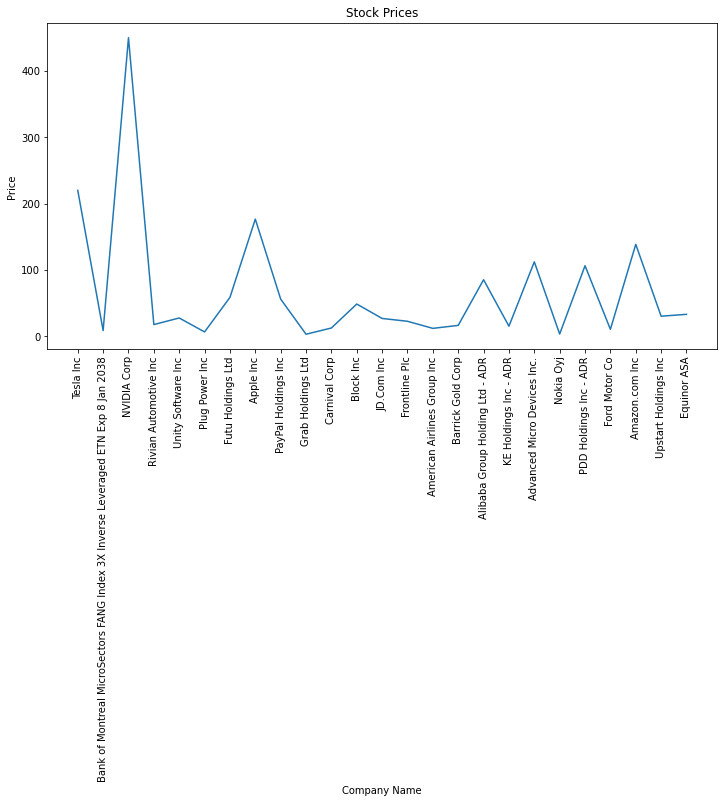

In [302]:

# Setting the Company Name as the index for better visualization
data.set_index('Company Name', inplace=True)

# Line Plot for Price
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='Price')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.title('Stock Prices')
plt.xticks(rotation=90)
plt.show()

### `Observation:`

1. **Price Range**: The prices of these companies vary significantly, from very low values like Grab Holdings Ltd at $3.16 to higher values such as Amazon.com Inc at $138.60. This wide range reflects the diversity of companies listed in the dataset.

2. **Volatility**: Some companies have relatively stable stock prices, such as Bank of Montreal MicroSectors FANG Index 3X at $8.66, while others like Tesla Inc at $219.96 or Amazon.com Inc at $138.60 have higher volatility, which may be attributed to various factors affecting their stock prices.

3. **Industry Variation**: These companies come from various industries, including technology (e.g., Tesla Inc, NVIDIA Corp), e-commerce (e.g., Amazon.com Inc), finance (e.g., Bank of Montreal MicroSectors FANG Index 3X), and more. The stock prices are influenced by the performance and prospects of their respective industries.

4. **Market Capitalization**: While the stock price reflects the per-share value of a company, market capitalization (not shown in this subset) takes into account the total value of a company's outstanding shares. Larger companies like Amazon.com Inc (with a market cap in the trillions) have substantial influence on the stock market.

5. **Potential Investment Opportunities**: Depending on investment goals and risk tolerance, investors might find companies within this dataset that align with their investment strategies. Some may prefer established, lower-volatility stocks, while others may seek potential high-growth opportunities with higher volatility.



### <span style="color:cyan"> b). Price Changes for Different Companies</span>

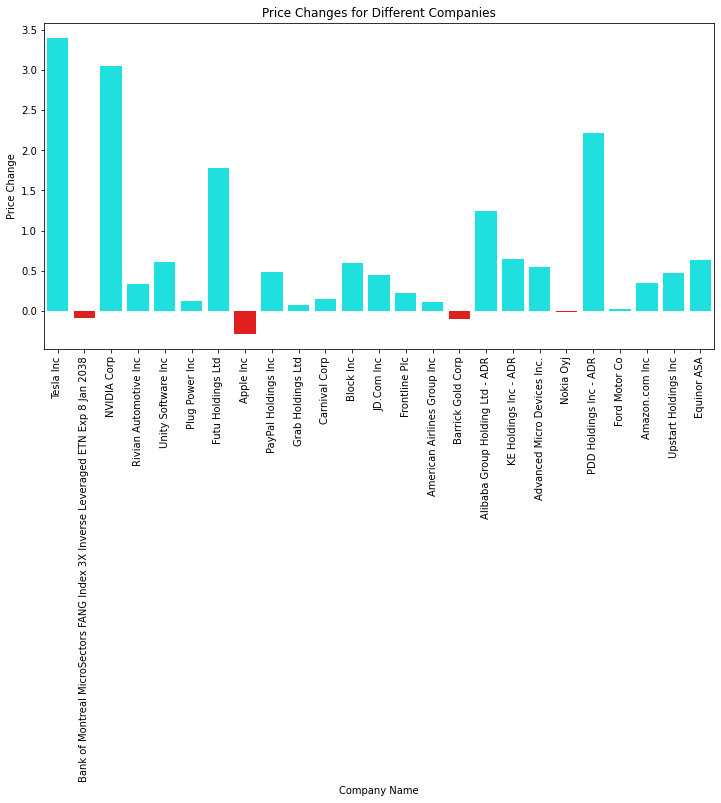

In [303]:
# Created a custom color palette
custom_colors = ['red' if val < 0 else 'cyan' for val in data['Price Change']]

# Bar Plot for Price Change with custom color palette
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x=data.index, y='Price Change', palette=custom_colors)
plt.xlabel('Company Name')
plt.ylabel('Price Change')
plt.title('Price Changes for Different Companies')
plt.xticks(rotation=90)
plt.show()

### `Observation:`

1. **Positive and Negative Changes**: The price changes of the companies in this dataset show both positive and negative values. Positive changes indicate an increase in stock prices, while negative changes represent a decrease.

2. **Varying Magnitudes**: The magnitude of price changes varies widely. Companies like PDD Holdings Inc - ADR have a significant positive change of 2.22, reflecting substantial growth. On the other hand, companies like Apple Inc and Barrick Gold Corp have negative changes of -0.29 and -0.10, respectively, suggesting a decline in their stock prices.

3. **Influence of Market Factors**: Stock prices are influenced by a range of factors, including economic conditions, industry performance, company earnings reports, and market sentiment. Positive price changes may be linked to strong financial results or favorable market conditions.

4. **Diverse Industry Impact**: Different industries are represented among these companies, and this diversity can lead to varied price changes. For instance, technology companies like NVIDIA Corp tend to experience fluctuations based on technological advancements and market trends, while companies in sectors like finance, such as Bank of Montreal MicroSectors FANG Index 3X, might show more stable price changes.

5. **Investment Opportunities**: Investors often look for companies with positive price changes, indicating growth potential. However, some investors also consider companies with small, negative changes as opportunities to buy stocks at a lower price with the anticipation of future gains.

6. **Risk Management**: When building an investment portfolio, it's crucial to diversify by including stocks with different price change dynamics. Combining companies with both positive and negative changes can help spread risk and capture potential gains.

7. **Continuous Monitoring**: Stock prices are subject to change continuously. It's important for investors to monitor their investments and stay informed about factors affecting stock prices, making timely decisions based on their investment goals.




### <span style="color:cyan"> c). Pre-Market Prices for the Different Companies</span>

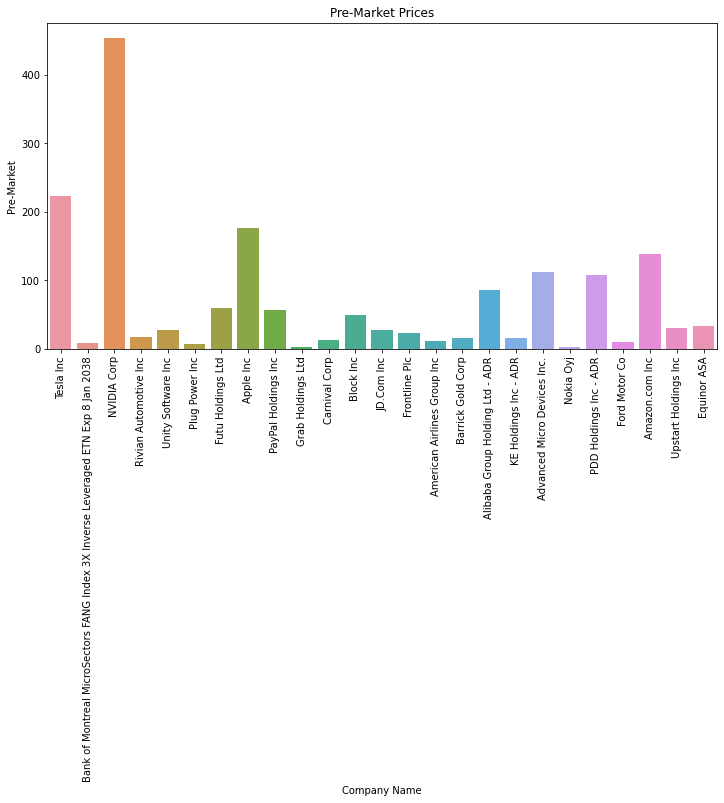

In [304]:

# Bar Plot for Pre-Market
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x=data.index, y='Pre-Market')
plt.xlabel('Company Name')
plt.ylabel('Pre-Market')
plt.title('Pre-Market Prices')
plt.xticks(rotation=90)
plt.show()

### `Observation:`


1. **Early Trading**: Pre-market prices reflect the trading activity of a stock before the official market opening. They can provide insights into investor sentiment and expectations for the trading day ahead.

2. **Positive and Negative Changes**: Similar to regular market prices, pre-market prices show both positive and negative changes. A positive pre-market value indicates that a stock's price is higher before the market opens, while a negative value suggests a lower opening price.

3. **Varying Magnitudes**: The magnitude of pre-market price changes varies across different companies. For example, PDD Holdings Inc - ADR has a substantial positive change of 2.22, while other companies like Apple Inc and Barrick Gold Corp have smaller positive changes.

4. **Market News and Events**: Pre-market price changes can be influenced by overnight news, earnings reports, economic data, or events that impact the company or industry. Positive pre-market changes can be linked to positive news, while negative changes may result from negative news.

5. **Trading Volume**: Trading volume in the pre-market can be lower than during regular trading hours, which means that prices may be more volatile, and price changes can occur with smaller trading volumes.

6. **Trading Strategies**: Some investors and traders use pre-market price information to make trading decisions. For example, they may react to significant news events by buying or selling stocks in the pre-market to take advantage of early price movements.

7. **Caution**: Pre-market prices may not always accurately predict how a stock will perform during regular trading hours. They can be more speculative and may not represent the overall market consensus.

8. **Risk Management**: Trading during pre-market hours carries a degree of risk, and investors should approach it with caution. It's essential to conduct thorough research and have a well-defined trading strategy.




### <span style="color:cyan"> d). Previous Close Prices</span>

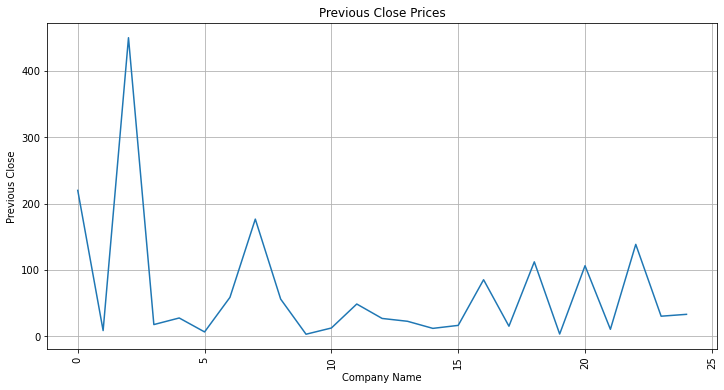

In [321]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=data.index, y='Previous Close')
plt.xlabel('Company Name')
plt.ylabel('Previous Close')
plt.title('Previous Close Prices')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### `Observation:`

1. **Closing Price**: The previous close price represents the last traded price of a stock at the end of the previous trading session. It is a crucial reference point for investors.

2. **Price Variations**: The companies listed have varying previous close prices, ranging from as low as $3.16 for Grab Holdings Ltd to as high as $450.05 for NVIDIA Corp. These differences reflect the diverse nature of the companies and their respective valuations.

3. **Market Capitalization**: Previous close prices contribute to a company's market capitalization, which is the total market value of its outstanding shares. Higher-priced stocks can have a more substantial market capitalization, as seen in the case of NVIDIA Corp.

4. **Investor Sentiment**: Previous close prices can influence investor sentiment. A higher previous close might be seen as a sign of confidence in the company, while a lower close may suggest market concerns.

5. **Price Changes**: Price changes between the previous close and the current market price (or pre-market price) can provide insights into how a stock may perform in the upcoming trading session.

6. **Investment Decisions**: Investors and traders often use previous close prices as a basis for making buy or sell decisions. A stock trading above its previous close may be considered bullish, while a stock trading below it may be viewed as bearish.

7. **Historical Data**: Monitoring previous close prices over time helps investors track the performance of their investments and assess whether they align with their financial goals.

8. **Volatility and Risk**: Stocks with higher volatility may experience larger price swings between the previous close and the next trading session. Understanding this volatility is essential for risk management.

9. **Comparative Analysis**: Investors often compare previous close prices with various other financial metrics to make informed investment decisions.

10. **Diversification**: A portfolio consisting of stocks with different previous close prices can help investors diversify their risk and exposure to different sectors and industries.


### <span style="color:cyan"> e). Price Distribution by Company</span>

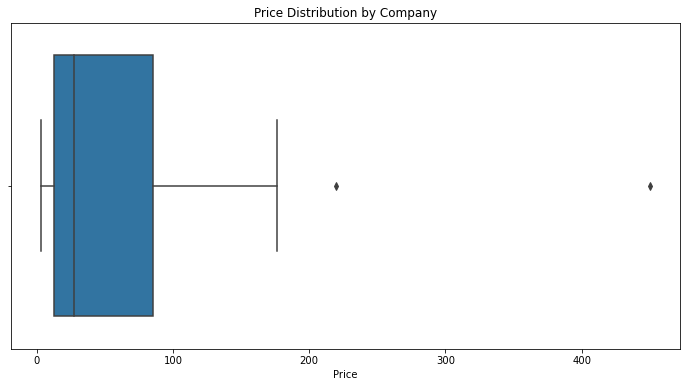

In [306]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data["Price"])
plt.title('Price Distribution by Company')
plt.show()

### `Observation:`

1. **Price Distribution**: The box plot displays the distribution of stock prices for the listed companies. It shows the range and variability in stock prices.

2. **Outliers**: Some companies have stock prices significantly higher or lower than the majority of the companies. For example, NVIDIA Corp (Company 2) and Amazon.com Inc (Company 22) have notably higher stock prices, while Grab Holdings Ltd (Company 9) and Nokia Oyj (Company 19) have relatively lower stock prices. These companies are considered outliers in terms of price.

3. **Price Range**: The prices range from as low as approximately $3.16 for Grab Holdings Ltd to as high as $450.05 for NVIDIA Corp. This wide price range highlights the diversity of companies in the dataset.

4. **Potential Investment Opportunities**: Investors seeking lower-priced stocks for investment may consider companies with prices below the median. Conversely, those interested in higher-priced stocks may look at companies above the median.

5. **Risk Assessment**: Higher-priced stocks may have greater potential for price fluctuations, while lower-priced stocks may be considered less risky. Investors should consider their risk tolerance when choosing investments.

6. **Portfolio Diversification**: Diversifying a portfolio with stocks from different price ranges can help manage risk and exposure to various industries and sectors.

7.  **Market Capitalization**: Price is a significant factor in determining a company's market capitalization. High-priced stocks often result in higher market capitalization.


### <span style="color:cyan"> f). Correlation Heatmap</span>

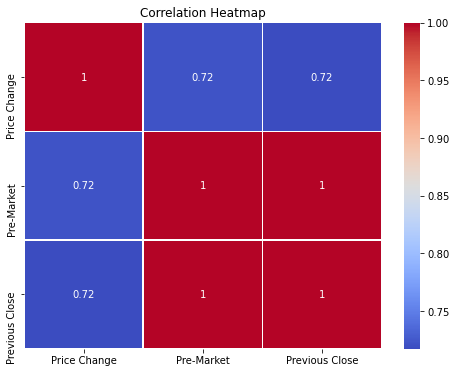

In [307]:
correlation = data[['Price Change', 'Pre-Market', 'Previous Close']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### `Observation:`

1. **Price Change vs. Pre-Market (0.721846)**: There is a strong positive correlation (0.721846) between the "Price Change" and "Pre-Market" values. This suggests that when the stock prices change positively (increase) or negatively (decrease), there is a strong tendency for the pre-market prices to move in the same direction. In other words, when stock prices change in one direction, pre-market prices tend to change in a similar direction.

2. **Pre-Market vs. Previous Close (0.999977)**: There is an extremely strong positive correlation (0.999977) between "Pre-Market" and "Previous Close." This indicates that the pre-market prices are almost perfectly positively correlated with the previous close prices. It suggests that the pre-market prices are almost identical to the previous close prices, with very little variation between them.

3. **Price Change vs. Previous Close (0.717173)**: There is a strong positive correlation (0.717173) between "Price Change" and "Previous Close." This implies that changes in stock prices are positively related to the previous close prices. In simpler terms, when the stock prices change (increase or decrease), there is a strong tendency for these changes to align with the direction of the previous close prices.

# `4. SAVING THE DATA INTO A CSV`

In [309]:
# Here, I created a CSV file name with the current date and time
csv_file = f'{datetime.now().strftime("%Y-%m-%d_%H-%M")} Google_Finance_Data.csv'

# Lastly, I saved the DataFrame to a CSV file, excluding the index column
data.to_csv(csv_file, index=False)